In [77]:
!pip install pyfoma

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


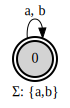

In [78]:
from pyfoma import *
FST.re("(a|b)*").view()

#This is the toy FST grammar on Telugu language. I covered 28 stems which includes 10 Nouns, 8 Adjectives and 10 Verbs.
# Gloss of the stems of Nouns       
1.  ata->play.                       
2.  aaku->leaf.                      
3.  iga->housefly.                   
4.  konda->mountain.                 
5.  pata->song.                      
6.  katha ->story.                   
7.  pavuram-> pigeon.                
8.  poratam ->fight.                 
9.  simham -> lion.                  
10. pamu -> snake.                   

# Gloss of the Adjectives derived form nouns by adding -ga morpheme.
1. andam -> beauty                   
2. vedi -> hot
3. challa -> cold
4. pedda -> big
5. chinna -> small
6. ettu -> tall
7. podava -> long
8. karam -> spicy

# Gloss of the verbs in past tense.

1. tin -> eat.
2. pad -> sing.
3. vin -> listen.
4. chus -> see.
5. ches -> do.
6. chaduv -> study.
7. un -> be.
8. ras -> write.
9. tag -> drink.
10. kat -> tie.






In [21]:
from pyfoma import *

In [83]:
# Grammar with Nouns,Verbs, Adjectives of Telugu language.
Grammar = {}
Grammar["S"] = [("", "Noun"),("","Adjective"),("", "Verb")]
Grammar["Noun"] = [("ata", "NInfl"), ("aaku", "NInfl"), ("iga", "NInfl"),
                   ("konda", "NInfl"),("pata", "NInfl"),("katha", "NInfl"),("pavuram","NInfl"), ("poratam","NInfl"),("simham","NInfl"),("pamu","NInfl")]

Grammar["Adjective"] = [("andam","AInfl"),("vedi","AInfl"),("challa","AInfl"),("pedda","AInfl"),\
                        ("chinna","AInfl"),("ettu","AInfl"),("podava","AInfl"),("karam","AInfl")]

Grammar["Verb"] = [("tin", "VInfl"), ("pad", "VInfl"), ("vin", "VInfl"), \
                   ("chus", "VInfl"),("ches", "VInfl"),("chaduv", "VInfl"),("un","VInfl"),("ras","VInfl"),("tag","VInfl"),("kat","VInfl")]


In [84]:
#Plurals of the Telugu nouns are formed by adding -lu morpheme to the singlular nouns.
Grammar["NInfl"] = [(("'[N]''[Sg]'", ""), "#"), (("'[N]''[Pl]'", "+lu"), "#")]

In [85]:
#Adjectives of Telugu can be derived from Nouns by adding "-ga" morpheme.
Grammar["AInfl"] = [(("'[N]'",""),"#"), (("'[A]'","+ga"),"#"),]

In [86]:
#Verbs of Telugu in past tense.
Grammar["VInfl"] = [(("'[V]'", ""), "#"), (("'[V]''[Past]''[1P]''[Sg]'", "+nu"), "#"), \
                    (("'[V]''[Past]''[1P]''[pl]'", "+mu"), "#"),(("'[V]''[Past]''[2P]''[Sg]'", "+vu"), "#"),\
                    (("'[V]'[Past]'[2P]''[pl]'", "+ru"), "#"), (("'[V]'[Past]'[3P]''[mas]''[Sg]'", "+du"), "#"),\
                    (("'[V]'[Past]'[3P]''[fem]''[Sg]'", "+indi"), "#"),(("'[V]'[Past]'[3P]''[pl]'", "+ru"), "#")]


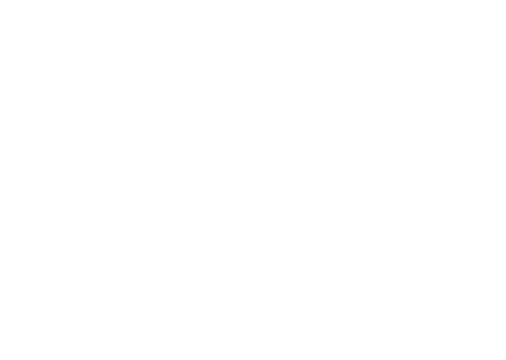

In [87]:
#Creating a lexicon.
lexicon =   FST.rlg(Grammar,"S")
lexicon.view()

In [88]:
#viewing the paradigm of the lexicon.
# We see there are certain irregeralities in the lexicon.
from pyfoma import Paradigm
print(Paradigm(lexicon, ".*"))

aaku          [N][Pl]            aaku+lu      
aaku          [N][Sg]            aaku         
andam         [A]                andam+ga     
andam         [N]                andam        
ata           [N][Pl]            ata+lu       
ata           [N][Sg]            ata          
chaduv        [V]                chaduv       
chaduv        [V][Past][1P][Sg]  chaduv+nu    
chaduv        [V][Past][1P][pl]  chaduv+mu    
chaduv        [V][Past][2P][Sg]  chaduv+vu    
chaduv[Past]  [V][2P][pl]        chaduv+ru    
chaduv[Past]  [V][3P][fem][Sg]   chaduv+indi  
chaduv[Past]  [V][3P][mas][Sg]   chaduv+du    
chaduv[Past]  [V][3P][pl]        chaduv+ru    
challa        [A]                challa+ga    
challa        [N]                challa       
ches          [V]                ches         
ches          [V][Past][1P][Sg]  ches+nu      
ches          [V][Past][1P][pl]  ches+mu      
ches          [V][Past][2P][Sg]  ches+vu      
ches[Past]    [V][2P][pl]        ches+ru      
ches[Past]   

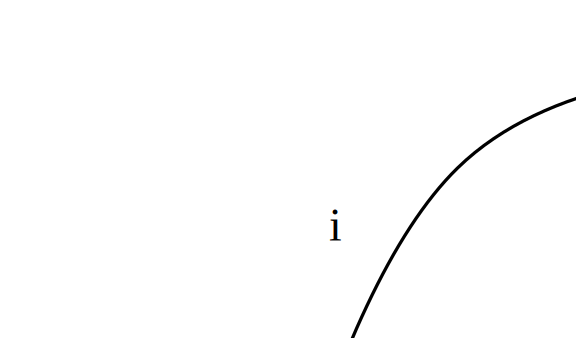

In [89]:
#Determinize and minimize it
fsts = {}
fsts['lexicon'] = lexicon.epsilon_remove().determinize().minimize()
fsts['lexicon'].view()

In [90]:
#Rewrite rules to remove irregularities from the lexicon.
fsts['mdelete'] = FST.re("$^rewrite(m:'' / _ \+ [ml])")
fsts['inreplace'] = FST.re("$^rewrite(in:a / (tin|vin|nad|un) \+ _di)")
fsts['idelete'] = FST.re("$^rewrite(i:'' / (tin|vin|un) \+ _adi)")
fsts['ainsert'] = FST.re("$^rewrite('':a / (chaduv|ches|chus|pad|tin|vin|kat|un|tag|ras) \+ _ (nu|mu|vu|ru|du))")
fsts['cleanup'] = FST.re("$^rewrite('+':'')")  
fsts['Telugu'] = FST.re("$lexicon @ $mdelete @ $inreplace @ $idelete @ $ainsert @ $cleanup ", fsts)

In [91]:
#paradigm of the lexicon after the application of the rewrite rules.
print(Paradigm(fsts['Telugu'], ".*"))

aaku          [N][Pl]            aakulu      
aaku          [N][Sg]            aaku        
andam         [A]                andamga     
andam         [N]                andam       
ata           [N][Pl]            atalu       
ata           [N][Sg]            ata         
chaduv        [V]                chaduv      
chaduv        [V][Past][1P][Sg]  chaduvanu   
chaduv        [V][Past][1P][pl]  chaduvamu   
chaduv        [V][Past][2P][Sg]  chaduvavu   
chaduv[Past]  [V][2P][pl]        chaduvaru   
chaduv[Past]  [V][3P][fem][Sg]   chaduvindi  
chaduv[Past]  [V][3P][mas][Sg]   chaduvadu   
chaduv[Past]  [V][3P][pl]        chaduvaru   
challa        [A]                challaga    
challa        [N]                challa      
ches          [V]                ches        
ches          [V][Past][1P][Sg]  chesanu     
ches          [V][Past][1P][pl]  chesamu     
ches          [V][Past][2P][Sg]  chesavu     
ches[Past]    [V][2P][pl]        chesaru     
ches[Past]    [V][3P][fem][Sg]   c